In [1]:
# install or import librairies

In [2]:
!pip install spacy
!python -m spacy download en -q
import pandas as pd
import numpy as np
import spacy

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!pip install wordcloud

In [4]:
import en_core_web_sm

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import wordcloud

In [6]:
#import dataset
corpus=pd.read_csv('sample-data.csv')

In [7]:
corpus.shape

(500, 2)

In [8]:
# display the first 5 lines
corpus.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [9]:
#Visualize row 1 and "description" column
corpus.loc[1,'description']

'Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that\'s fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won\'t roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Pr

In [10]:
# Clean up the text included in the "description" column which contains punctuation, capitals and various signs (HTML tags)

In [11]:
# Removal of upper case letters and transformation to lower case. Create a new column 'description_mod'
corpus['description_mod'] = corpus['description'].str.lower()
# Display the row 1 of "description_mod" column
corpus.loc[1,'description_mod']

'active sport boxer briefs - skinning up glory requires enough movement without your boxers deciding to poach their own route. the form-fitting active sport boxer briefs are made from breathable 93% polyester (71% recycled) fabric that\'s fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won\'t roll or bind. the gusseted, flat-sewn 6" inseam (size m) is offset to prevent inner-thigh chafe. fly-free with a smooth front panel. recyclable through the common threads recycling program.<br><br><b>details:</b><ul> <li>"stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>seamless construction</li> <li>"flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>fly-free support</li> <li>"inseam (size m) is 6"""</li></ul><br><br><b>fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. recyclable through the common threads recycling pr

In [12]:
# Removal of HTML tags
corpus['description_mod'] = corpus['description_mod'].str.replace(r"<[a-z/]+>", " ") 
corpus.loc[0,'description_mod']

'active classic boxers - there\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. the quick-drying, lightweight underwear takes up minimal space in a travel pack. an exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. made of 3.7-oz 100% recycled polyester with moisture-wicking performance. inseam (size m) is 4 1/2". recyclable through the common threads recycling program.   details:    "silky capilene 1 fabric is ultralight, breathable and quick-to-dry"   "exposed, brushed elastic waistband for comfort"   5-panel construction with traditional boxer back   "inseam (size m) is 4 1/2"""     fabric:  3.7-oz 100% all-recycled polyester with gladiodor natural odor control for the garment. recyclable through the common threads recycling program   weight:  99 g (3.5 oz)  made in mexico.'

In [13]:
# Removing special characters and numbers
corpus['description_mod'] = corpus['description_mod'].str.replace(r"[^A-Za-z]+", " ") 
corpus.loc[0,'description_mod']

'active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly made of oz recycled polyester with moisture wicking performance inseam size m is recyclable through the common threads recycling program details silky capilene fabric is ultralight breathable and quick to dry exposed brushed elastic waistband for comfort panel construction with traditional boxer back inseam size m is fabric oz all recycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling program weight g oz made in mexico '

In [14]:
corpus.head()

,id,description,description_mod
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...


In [15]:
# Creating an nlp object

In [16]:
nlp = en_core_web_sm.load()

In [17]:
# Tokenization of the "description _mod" column

In [18]:
corpus['corpus_tokenized']=corpus['description_mod'].apply(lambda x: nlp(x))
corpus.head()

,id,description,description_mod,corpus_tokenized
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"(active, classic, boxers, there, s, a, reason,..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"(active, sport, boxer, briefs, skinning, up, g..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"(active, sport, briefs, these, superbreathable..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"(alpine, guide, pants, skin, in, climb, ice, s..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"(alpine, wind, jkt, on, high, ridges, steep, i..."


In [19]:
# Remove common words or STOPWORDS

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'doing', 'hundred', 'alone', 'us', 'really', 'make', 'ourselves', 'latterly', 'he', "n't", 'again', 'before', 'though', 'there', 'hence', 'almost', 'last', 'may', 'most', 'was', '’d', 'until', 'something', 'two', 'sometimes', 'nobody', 'mostly', 'sixty', 'else', 'both', 'few', 'nevertheless', 'various', 'show', 'bottom', 'except', 'nowhere', 'unless', 'within', 'eight', 'be', 'beforehand', 'amount', 'thru', 'against', 'even', 'through', 'besides', 'everywhere', 'top', 'whenever', 'does', 'not', 'regarding', 'whom', 'after', '‘ve', 'where', 'here', 'due', 'them', 'that', 'i', 'could', '‘re', 'for', 'fifty', 'these', 'anything', 'although', 'with', 'whereas', 'nine', 'name', 'whereupon', 'serious', 'why', 'then', 'eleven', 'five', 'put', 'whereafter', 'since', 'latter', 'one', 'wherein', 'were', 'using', 'up', 'must', 'somewhere', 'per', 'however', "'ve", 'am', 'otherwise', 'how', 'hereafter', 'six', 'sometime', 'upon', 'himself', 'either', 'yet', 'every', 'over', 'your', 'they', 'will'

In [21]:
corpus['corpus_tokenized']=corpus['corpus_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
corpus.head()

,id,description,description_mod,corpus_tokenized
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a..."


In [22]:
corpus["corpus_tokenized_mod"] = [" ".join(x) for x in corpus['corpus_tokenized']]
corpus.head()

,id,description,description_mod,corpus_tokenized,corpus_tokenized_mod
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


In [23]:
# Using Scikit learn to determine the TF_IDF

In [24]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["corpus_tokenized_mod"])

In [25]:
X = X.toarray() # Convert to array
X.shape

(500, 3529)

In [26]:
vectorizer.vocabulary_  # Display of a dictionary (presence of key and item)

{'active': 24,
 'classic': 503,
 'boxer': 329,
 'reason': 2381,
 'cult': 716,
 'favorite': 1086,
 'cool': 639,
 'especially': 1015,
 'sticky': 2892,
 'situation': 2719,
 'quick': 2342,
 'dry': 902,
 'lightweight': 1711,
 'underwear': 3274,
 'minimal': 1885,
 'space': 2816,
 'travel': 3191,
 'pack': 2095,
 'expose': 1047,
 'brush': 359,
 'waistband': 3388,
 'offer': 2032,
 'skin': 2730,
 'softness': 2797,
 'panel': 2113,
 'construction': 616,
 'traditional': 3174,
 'fit': 1131,
 'functional': 1236,
 'fly': 1175,
 'oz': 2092,
 'recycle': 2390,
 'polyester': 2240,
 'moisture': 1909,
 'wicke': 3462,
 'performance': 2168,
 'inseam': 1543,
 'size': 2720,
 'recyclable': 2389,
 'common': 572,
 'thread': 3110,
 'program': 2295,
 'silky': 2698,
 'capilene': 414,
 'fabric': 1064,
 'ultralight': 3254,
 'breathable': 337,
 'brushed': 360,
 'elastic': 949,
 'comfort': 563,
 'gladiodor': 1279,
 'natural': 1959,
 'odor': 2031,
 'control': 629,
 'garment': 1252,
 'weight': 3439,
 'mexico': 1855,
 'spor

In [27]:
# Creation of a dataframe to visualize the data

In [28]:
X_data = pd.DataFrame(X, 
             columns=vectorizer.get_feature_names(), 
             index=["item_{}".format(x) for x in range(corpus.shape[0])] )

X_data.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yvon,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.197890,0.128476,0.0,0.0,0.0,0.0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.108044,0.046764,0.0,0.0,0.0,0.0


In [29]:
# Using DBSCAN with eps = 0.2

In [30]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric="cosine", algorithm="brute")

In [31]:
db.fit(X)

DBSCAN(algorithm='brute', eps=0.2, metric='cosine')

In [32]:
corpus['cluster_n'] = db.labels_ # Cluster labels. Noisy samples are given the label -1.
display(corpus.head())
X_data['cluster_n'] = db.labels_ 
display(X_data.head())

,id,description,description_mod,corpus_tokenized,corpus_tokenized_mod,cluster_n
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,cluster_n
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.197890,0.128476,0.0,0.0,0.0,0.0,-1
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108044,0.046764,0.0,0.0,0.0,0.0,-1


In [33]:
# Determine the number of values for each cluster
corpus['cluster_n'].value_counts()

-1    481
 2      7
 1      6
 0      6
Name: cluster_n, dtype: int64

In [34]:
# Using DBSCAN with eps=0.5

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5, metric="cosine", algorithm="brute")
db.fit(X)

DBSCAN(algorithm='brute', metric='cosine')

In [36]:
corpus['cluster_n'] = db.labels_
display(corpus.head())
X_data['cluster_n'] = db.labels_
display(X_data.head())

,id,description,description_mod,corpus_tokenized,corpus_tokenized_mod,cluster_n
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,cluster_n
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.197890,0.128476,0.0,0.0,0.0,0.0,-1
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108044,0.046764,0.0,0.0,0.0,0.0,-1


In [37]:
corpus['cluster_n'].value_counts()

-1     332
 4      48
 1      28
 7      15
 12     13
 3       8
 10      7
 6       7
 8       6
 5       6
 14      5
 13      5
 11      5
 9       5
 2       5
 0       5
Name: cluster_n, dtype: int64

In [38]:
# Using DBSCAN with eps=0.8

In [39]:
db = DBSCAN(eps=0.5, min_samples=5, metric="cosine", algorithm="brute")
db.fit(X)
corpus['cluster_n'] = db.labels_
display(corpus.head())
X_data['cluster_n'] = db.labels_
display(X_data.head())
corpus['cluster_n'].value_counts()

,id,description,description_mod,corpus_tokenized,corpus_tokenized_mod,cluster_n
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone,cluster_n
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.197890,0.128476,0.0,0.0,0.0,0.0,-1
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108044,0.046764,0.0,0.0,0.0,0.0,-1


-1     332
 4      48
 1      28
 7      15
 12     13
 3       8
 10      7
 6       7
 8       6
 5       6
 14      5
 13      5
 11      5
 9       5
 2       5
 0       5
Name: cluster_n, dtype: int64

In [40]:
cols = [x for x in X_data.columns if x!='cluster_n']
# affichage des colonnes autres que "cluster_n"

In [41]:
# Determine index of the clusters (sort by ascending)
corpus['cluster_n'].value_counts().index.sort_values()

Int64Index([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [42]:
# Create a for loop to display the cluster with the first ten means
for clust in corpus['cluster_n'].value_counts().index.sort_values() :
    print("CLUSTER ", clust)
    print(X_data.loc[X_data['cluster_n']==clust,cols].mean(axis=0).sort_values(ascending=False)[0:10])
    print('************************')

CLUSTER  -1
pocket        0.068711
recycle       0.059350
oz            0.054607
polyester     0.051838
cotton        0.050096
organic       0.050028
nylon         0.046244
recyclable    0.044994
common        0.043344
thread        0.043322
dtype: float64
************************
CLUSTER  0
pocket        0.221058
partially     0.198326
wide          0.159675
motion        0.157598
gussete       0.153939
crotch        0.148713
welt          0.145594
borderless    0.145538
spandex       0.141653
nylon         0.141233
dtype: float64
************************
CLUSTER  1
control      0.164603
gladiodor    0.158217
capilene     0.148708
natural      0.147720
odor         0.143284
garment      0.138189
fast         0.109271
recycle      0.104555
baselayer    0.101646
beneath      0.097092
dtype: float64
************************
CLUSTER  2
organizer      0.193885
pocket         0.193668
access         0.175557
strap          0.173865
laptop         0.166529
spacer         0.145752
office     

In [43]:
# Visualization of words in each cluster with Wordcloud

CLUSTER  -1


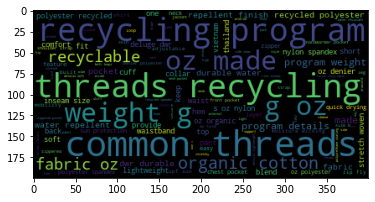

-----------
CLUSTER  0


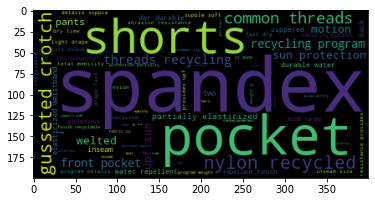

-----------
CLUSTER  1


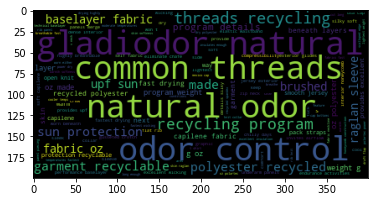

-----------
CLUSTER  2


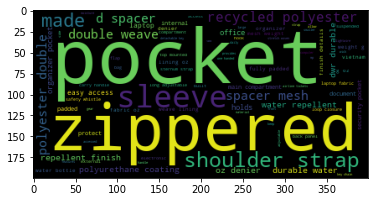

-----------
CLUSTER  3


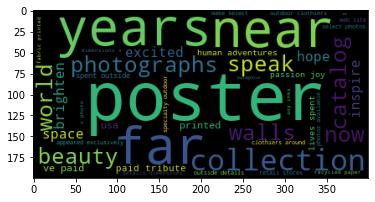

-----------
CLUSTER  4


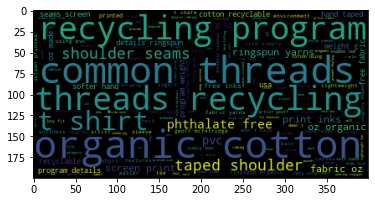

-----------
CLUSTER  5


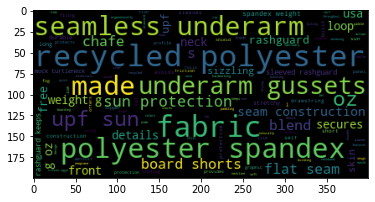

-----------
CLUSTER  6


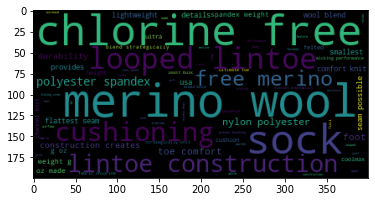

-----------
CLUSTER  7


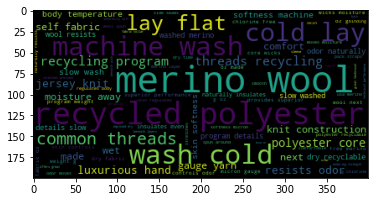

-----------
CLUSTER  8


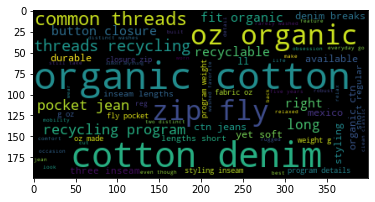

-----------
CLUSTER  9


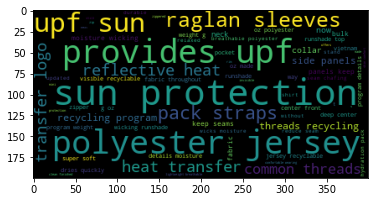

-----------
CLUSTER  10


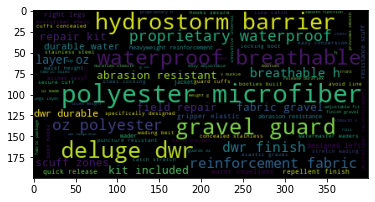

-----------
CLUSTER  11


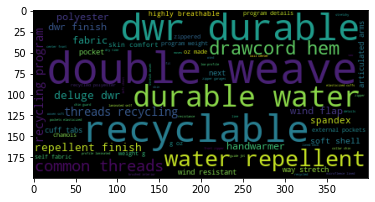

-----------
CLUSTER  12


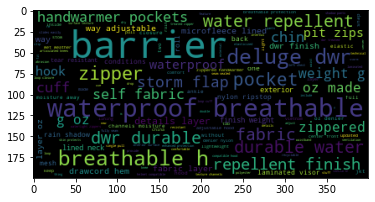

-----------
CLUSTER  13


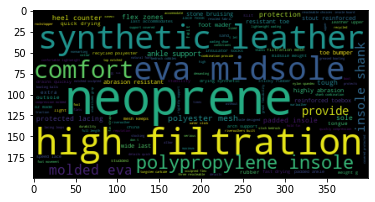

-----------
CLUSTER  14


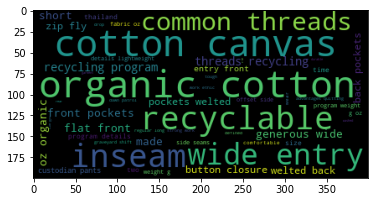

-----------


In [44]:
wd = wordcloud.WordCloud()
for clust in corpus['cluster_n'].value_counts().index.sort_values() :
    print("CLUSTER ", clust)
    text = " ".join(corpus.loc[corpus['cluster_n']==clust,'description_mod'])
    cloud = wd.generate(text)
    plt.imshow(cloud)
    plt.show()
    print('-----------')

In [45]:
# Creation of a recommendation system

In [46]:
corpus.head()

,id,description,description_mod,corpus_tokenized,corpus_tokenized_mod,cluster_n
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,-1
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,-1
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,-1
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,-1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,-1


In [47]:
def find_similar_items(item_id):
    cluster_n = corpus.loc[corpus['id']==item_id, 'cluster_n'].values[0]
    similaire = corpus.loc[corpus['cluster_n']==cluster_n,:].sample(5)
    similaire = similaire.sample(5)['id'].unique()
    return similaire

In [65]:
product=int(input('Quel produit souhaitez_vous acheter ?:'))


Quel produit souhaitez_vous acheter ?: 5


In [66]:
 item = corpus.loc[corpus['id']==product, 'description'].values[0]

In [67]:
for i in find_similar_items(product):
        print('Item #', i)
        print(corpus.loc[corpus['id']==i, 'description'].values[0])
        print('*********************')

Item # 70
Light and variable surf trunks - Our lightest, leanest surf trunks are built for minimal underwater drag when diving and bodysurfing, and they pack down into their own tiny stuff pouch. Made from hardy but ultralightweight 3.5-oz 50-denier 100% polyester ripstop, the Light and Variables feature a flat-lying, 2-button gusseted fly and a stealth hip zip pocket. Inseam (size 32) is 8.5"; outseam, 19". Stuff pouch included. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Flat-lying, hidden 2-button fly with tie-closure"</li> <li>Stealth zippered hip pocket secures essentials</li> <li>Rear zippered pocket</li> <li>Includes mesh travel/stuff bag with shock-cord and toggle closure</li> <li>Hem hits just above the knee</li> <li>"Inseam is 8 1/2""; outseam 19"""</li></ul><br><br><b>Fabric: </b>3.5-oz 50-denier 100% polyester ripstop. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(129 g 4.5 oz)<br><br>Made in Viet

In [51]:
# Using a model

In [68]:
svd_model = TruncatedSVD(n_components=15)
lsa = svd_model.fit_transform(X)

topic_encoded_data = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_data["documents"] = corpus['description_mod']
topic_encoded_data.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,documents
0,0.277859,-0.042790,0.186392,0.102692,-0.114103,0.012376,-0.082071,-0.004731,-0.131392,-0.059883,-0.035328,-0.002335,0.082417,0.012515,-0.006745,active classic boxers there s a reason why our...
1,0.301520,-0.051620,0.102659,0.108902,-0.022611,0.146002,-0.007006,-0.009209,-0.091422,-0.099729,-0.066706,0.051069,0.103760,0.045834,0.029970,active sport boxer briefs skinning up glory re...
2,0.290454,-0.074977,0.108659,0.029584,-0.024719,0.119223,0.090458,0.066175,-0.065939,-0.029268,-0.040387,0.101265,0.107635,0.046983,0.054214,active sport briefs these superbreathable no f...
3,0.414400,-0.260905,-0.114445,-0.150014,0.037343,-0.005856,-0.052541,-0.122896,-0.011489,-0.140694,-0.050071,-0.095434,0.137504,-0.108762,0.072192,alpine guide pants skin in climb ice switch to...
4,0.402028,-0.273101,-0.019424,-0.250344,-0.038854,-0.061847,0.022687,0.001700,0.104465,-0.159197,-0.022009,-0.209173,0.257157,0.195409,-0.040139,alpine wind jkt on high ridges steep ice and a...


In [69]:
topic_document_0 = np.abs(topic_encoded_data.iloc[0,:-1])
main_topic = topic_document_0.sort_values(ascending=False).index[0]
print(main_topic)

topic_0


In [70]:
topic_document_3 = np.abs(topic_encoded_data.iloc[3,:-1])
main_topic = topic_document_3.sort_values(ascending=False).index[3]
print(main_topic)

topic_9


In [71]:
topic_document_4 = np.abs(topic_encoded_data.iloc[4,:-1])
main_topic = topic_document_4.sort_values(ascending=False).index[4]
print(main_topic)

topic_11


In [72]:
def main_topics(x):
    topics = np.abs(x)
    main_topic = topics.sort_values(ascending=False).index[0]
    return main_topic


In [73]:
# # Initialization of the "main topic" column with NaNs
topic_encoded_data.loc[:, 'main_topic'] = np.nan

In [74]:
# Iteration on the lines with the function .iterrows ()
for i, row in topic_encoded_data.iloc[:,:-2].iterrows():
    topic_encoded_data.loc[i, 'main_topic'] = main_topics(row)


In [75]:
topic_encoded_data.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,documents,main_topic
0,0.277859,-0.042790,0.186392,0.102692,-0.114103,0.012376,-0.082071,-0.004731,-0.131392,-0.059883,-0.035328,-0.002335,0.082417,0.012515,-0.006745,active classic boxers there s a reason why our...,topic_0
1,0.301520,-0.051620,0.102659,0.108902,-0.022611,0.146002,-0.007006,-0.009209,-0.091422,-0.099729,-0.066706,0.051069,0.103760,0.045834,0.029970,active sport boxer briefs skinning up glory re...,topic_0
2,0.290454,-0.074977,0.108659,0.029584,-0.024719,0.119223,0.090458,0.066175,-0.065939,-0.029268,-0.040387,0.101265,0.107635,0.046983,0.054214,active sport briefs these superbreathable no f...,topic_0
3,0.414400,-0.260905,-0.114445,-0.150014,0.037343,-0.005856,-0.052541,-0.122896,-0.011489,-0.140694,-0.050071,-0.095434,0.137504,-0.108762,0.072192,alpine guide pants skin in climb ice switch to...,topic_0
4,0.402028,-0.273101,-0.019424,-0.250344,-0.038854,-0.061847,0.022687,0.001700,0.104465,-0.159197,-0.022009,-0.209173,0.257157,0.195409,-0.040139,alpine wind jkt on high ridges steep ice and a...,topic_0


In [76]:
# Determine the number of values for each topic
topic_encoded_data['main_topic'].value_counts()

topic_0     267
topic_1      61
topic_6      37
topic_2      35
topic_7      29
topic_3      17
topic_11     10
topic_4       9
topic_5       8
topic_10      8
topic_14      6
topic_8       6
topic_9       5
topic_13      1
topic_12      1
Name: main_topic, dtype: int64

In [77]:
# DataFrame containing the description of the "topic" with the vocabulary words
description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])


description = description.apply(np.abs, axis = 1)

description.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yvon,zinger,zip,zipped,zipper,zippered,zippers,zipping,zips,zone
topic_0,0.001126,0.002290,0.000377,0.018868,0.000783,0.000868,0.000890,0.001223,0.001322,0.001270,...,0.001518,0.000617,0.088690,0.000918,0.109579,0.045247,0.001389,0.001781,0.002073,0.007053
topic_1,0.000487,0.000817,0.000393,0.022865,0.000692,0.000855,0.000644,0.001774,0.001454,0.003761,...,0.004731,0.000835,0.058157,0.001051,0.125991,0.053770,0.002038,0.002601,0.001922,0.010320
topic_2,0.003509,0.006276,0.000032,0.018621,0.000084,0.000071,0.002170,0.001128,0.000567,0.000541,...,0.000680,0.000779,0.072350,0.000374,0.062756,0.045916,0.001675,0.001887,0.000581,0.000008
topic_3,0.000665,0.000142,0.000079,0.012915,0.000903,0.001949,0.000266,0.003432,0.000120,0.002093,...,0.003201,0.000951,0.080874,0.001078,0.147257,0.035496,0.003013,0.004739,0.002841,0.016640
topic_4,0.004327,0.009214,0.000757,0.017289,0.000643,0.000345,0.001997,0.000714,0.000174,0.000065,...,0.000506,0.000407,0.013492,0.000002,0.009479,0.012464,0.001208,0.000682,0.001723,0.019654


In [78]:
for i,row in description.iterrows():
    print(i)
    print(row.sort_values(ascending=False)[0:5].index.tolist())  

topic_0
['recycle', 'pocket', 'oz', 'organic', 'cotton']
topic_1
['organic', 'cotton', 'shirt', 'print', 'ringspun']
topic_2
['merino', 'odor', 'pocket', 'wool', 'control']
topic_3
['inseam', 'organic', 'cotton', 'button', 'short']
topic_4
['merino', 'wool', 'wash', 'sun', 'capilene']
topic_5
['nylon', 'organic', 'sun', 'cotton', 'fleece']
topic_6
['spandex', 'coverage', 'tencel', 'inseam', 'pocket']
topic_7
['strap', 'mesh', 'waterproof', 'barrier', 'polyurethane']
topic_8
['sun', 'upf', 'protection', 'fleece', 'collar']
topic_9
['fleece', 'waterproof', 'sun', 'protection', 'barrier']
topic_10
['photo', 'poster', 'outside', 'retail', 'human']
topic_11
['fleece', 'microfiber', 'polyester', 'dwr', 'reflective']
topic_12
['waterproof', 'nylon', 'microfiber', 'coverage', 'fleece']
topic_13
['denim', 'jean', 'heat', 'construction', 'logo']
topic_14
['coverage', 'sock', 'jean', 'toe', 'denim']


In [63]:
# Visualization

*********************
topic_0


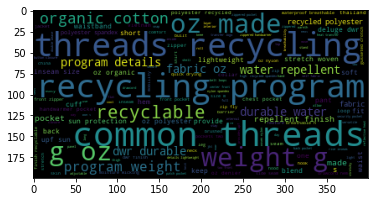

*********************
topic_1


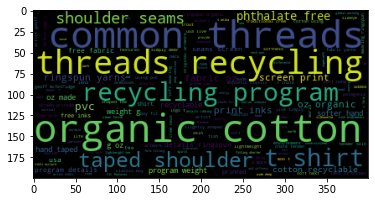

*********************
topic_2


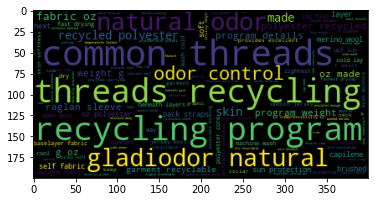

*********************
topic_3


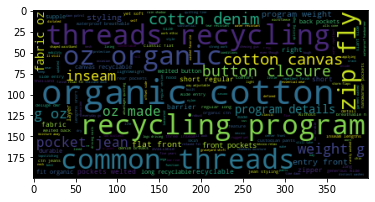

*********************
topic_4


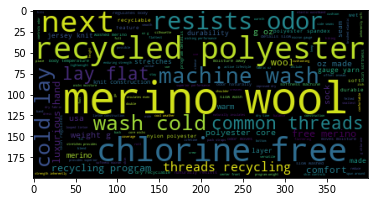

*********************
topic_5


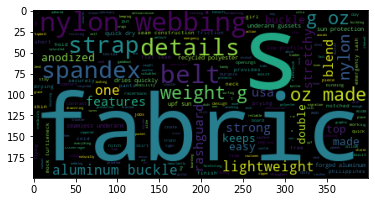

*********************
topic_6


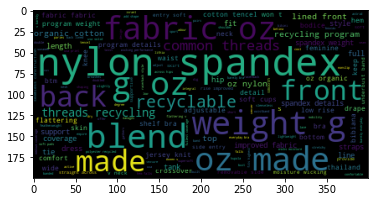

*********************
topic_7


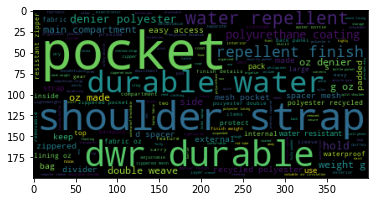

*********************
topic_8


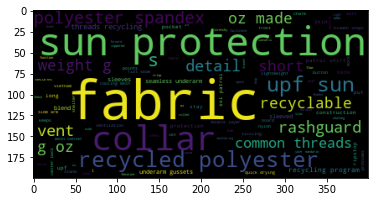

*********************
topic_9


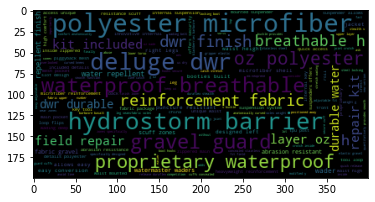

*********************
topic_10


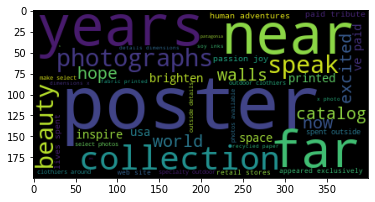

*********************
topic_11


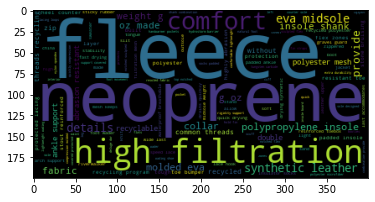

*********************
topic_12


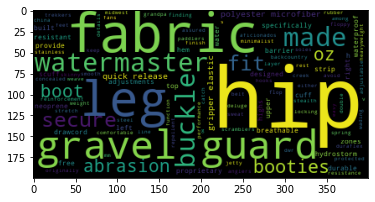

*********************
topic_13


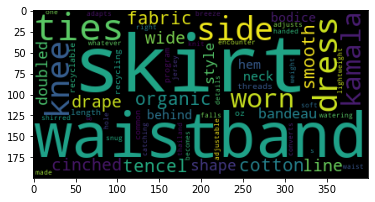

*********************
topic_14


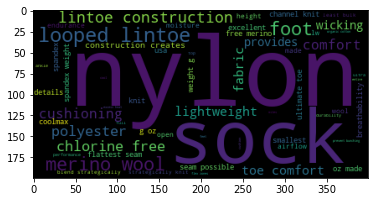

In [79]:
wd = wordcloud.WordCloud()

cols = [col for col in topic_encoded_data.columns if 'topic_' in col]

# Topic display
for col in cols:
    print('*********************')
    print(col)
    
# Display of topic terms

    text = " ".join(topic_encoded_data.loc[topic_encoded_data['main_topic']==col,'documents'])
    cloud = wd.generate(text)
    plt.imshow(cloud)
    plt.show()
    